In [81]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('../data/comprovantes_pix_10000_anomalias.csv', sep=';')
df.head()

,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0


### Análise exploratória dos dados
Primeiramente, vamos carregar os dados e dar uma olhada nas primeiras linhas do dataset para entender

In [83]:
# Não identificamos nenhum valor nulo.
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EndToEndId          10000 non-null  str    
 1   DataHora            10000 non-null  str    
 2   Valor               10000 non-null  float64
 3   Moeda               10000 non-null  str    
 4   Pagador_Nome        10000 non-null  str    
 5   Pagador_CPF_CNPJ    10000 non-null  str    
 6   Pagador_Banco       10000 non-null  str    
 7   Recebedor_Nome      10000 non-null  str    
 8   Recebedor_CPF_CNPJ  10000 non-null  str    
 9   Recebedor_Banco     10000 non-null  str    
 10  ChavePix_Utilizada  10000 non-null  str    
 11  TipoChave           10000 non-null  str    
 12  Descricao           10000 non-null  str    
 13  Status              10000 non-null  str    
 14  Anomalia            10000 non-null  int64  
dtypes: float64(1), int64(1), str(13)
memory usage: 1.1 MB


In [84]:
df.describe()

,Valor,Anomalia
count,10000.000000,10000.000000
mean,2505.174503,0.010000
std,1456.244115,0.099504
min,0.000000,0.000000
25%,1238.232500,0.000000
50%,2520.240000,0.000000
75%,3765.190000,0.000000
max,4999.790000,1.000000


In [85]:
# Análisar a coluna de Status
df['Status'].unique()

<StringArray>
['Concluída', 'Pendente', 'Estornada']
Length: 3, dtype: str

In [86]:
df.describe()

,Valor,Anomalia
count,10000.000000,10000.000000
mean,2505.174503,0.010000
std,1456.244115,0.099504
min,0.000000,0.000000
25%,1238.232500,0.000000
50%,2520.240000,0.000000
75%,3765.190000,0.000000
max,4999.790000,1.000000


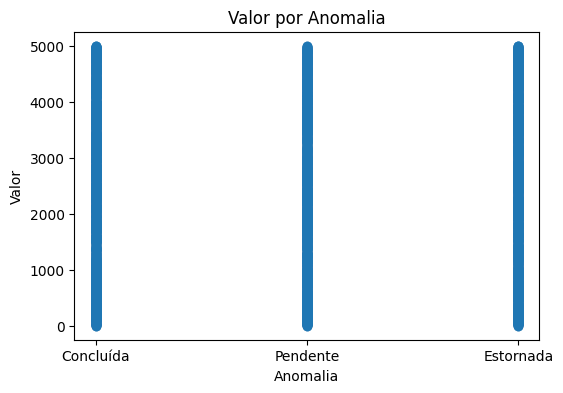

In [87]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Status"], df["Valor"], alpha=0.3)
plt.xlabel("Anomalia")
plt.ylabel("Valor")
plt.title("Valor por Anomalia")
plt.show()

## Feature Engineering

In [88]:
le = LabelEncoder()
df["Status_2"] = le.fit_transform(df["Status"])
df["TipoChave_2"] = le.fit_transform(df["TipoChave"])
df["Recebedor_Banco_2"] = le.fit_transform(df["Recebedor_Banco"])
df["Pagador_Banco_2"] = le.fit_transform(df["Pagador_Banco"])


df.head()

,EndToEndId,DataHora,Valor,Moeda,Pagador_Nome,Pagador_CPF_CNPJ,Pagador_Banco,Recebedor_Nome,Recebedor_CPF_CNPJ,Recebedor_Banco,ChavePix_Utilizada,TipoChave,Descricao,Status,Anomalia,Status_2,TipoChave_2,Recebedor_Banco_2,Pagador_Banco_2
0,f094cb2c-2a73-463c-b60e-0c57262051e4,2025-06-26 21:07:56,4658.86,BRL,Nathan Cardoso,13.253.967/0001-95,BTG Pactual,Ana Beatriz Ramos,901.361.580-95,Nubank,+559694830-9884,Telefone,Pagamento referente ao serviço 927,Concluída,0,0,4,11,0
1,f0409769-741f-49bd-811a-3842cc8f54db,2025-06-23 17:47:56,3184.72,BRL,Benjamin Barros,781.515.544-64,Banco do Brasil,Carlos Eduardo Nunes,288.758.607-72,Itaú Unibanco,+552298530-1917,Telefone,Pagamento referente ao serviço 950,Pendente,0,2,4,10,5
2,c1d22287-d343-4c91-b03d-dbe9a69695b3,2025-06-27 15:58:56,1054.48,BRL,Lorena Cunha,444.922.709-96,Banco Inter,Lívia Silveira,530.827.935-48,Bradesco,c4f4c3c6-4d78-4946-b33e-4a1135711a8a,Chave Aleatória,Pagamento referente ao serviço 173,Pendente,0,2,2,7,1
3,254423a9-50b7-41b1-a099-e8cf6232bab4,2025-07-15 13:59:56,3564.76,BRL,Sra. Luana Pinto,468.153.904-62,Banco Safra,Helena Pires,827.707.674-51,Caixa Econômica Federal,user421@email.com,E-mail,Pagamento referente ao serviço 560,Estornada,0,1,3,9,4
4,f1c5e3e7-bc62-4f18-91e3-c8f92aebdd59,2025-06-23 06:19:56,15.16,BRL,João Miguel da Cunha,83.407.726/0001-68,Santander Brasil,Dr. Luiz Felipe Dias,65.245.322/0001-12,C6 Bank,user97@email.com,E-mail,Pagamento referente ao serviço 140,Pendente,0,2,3,8,11


## Treinar o modelo de regressão logística

In [106]:
model = LogisticRegression(class_weight='balanced')
X = df.select_dtypes(include=['int64', 'float64']).drop('Anomalia', axis=1)
y = df['Anomalia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model.fit(X_train, y_train)

c:\Users\vitor\OneDrive - Indev\Estudos\Ementa da prova ciencia de dados\Python\estudos proprios\algoritimos\ribas\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

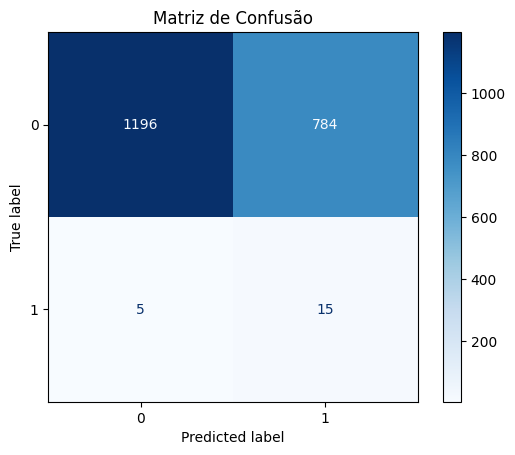

In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.show()
